# import libraries before use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsa_plots
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.filterwarnings("ignore")



In [2]:
import pandas as pd

# Read the CSV file and parse the 'Date' column as dates with the correct date format
df = pd.read_csv('Crude Oil Prices Daily.csv', parse_dates=['Date'], dayfirst=True)

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Now your 'Date' column should be interpreted correctly as dates
print(df.head())


            Closing Value
Date                     
1986-01-02          25.56
1986-01-03          26.00
1986-01-06          26.53
1986-01-07          25.85
1986-01-08          25.87


# Display first 5 records

In [3]:
df.head()

,Closing Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [4]:
# Assuming your DataFrame is named 'data', change the column name from 'Closing Value' to 'Close'
df.rename(columns={'Closing Value': 'Close'}, inplace=True)

# Now the column name 'Closing Value' has been changed to 'Close'
print(df.head())


            Close
Date             
1986-01-02  25.56
1986-01-03  26.00
1986-01-06  26.53
1986-01-07  25.85
1986-01-08  25.87


In [5]:
df.index #get values at index position

DatetimeIndex(['1986-01-02', '1986-01-03', '1986-01-06', '1986-01-07',
               '1986-01-08', '1986-01-09', '1986-01-10', '1986-01-13',
               '1986-01-14', '1986-01-15',
               ...
               '2023-09-25', '2023-09-26', '2023-09-27', '2023-09-28',
               '2023-09-29', '2023-10-02', '2023-10-03', '2023-10-04',
               '2023-10-05', '2023-10-06'],
              dtype='datetime64[ns]', name='Date', length=9564, freq=None)

In [6]:
df.index.nunique()  # get numober of distinct value at index column

9564

In [7]:
#get start and end value for index column
print("Start data of the data is ", df.index.min())
print("End data of the data is ", df.index.max())

Start data of the data is  1986-01-02 00:00:00
End data of the data is  2023-10-06 00:00:00


In [8]:
df.columns # get columns name

Index(['Close'], dtype='object')

In [9]:
df['Close']

Date
1986-01-02    25.56
1986-01-03    26.00
1986-01-06    26.53
1986-01-07    25.85
1986-01-08    25.87
              ...  
2023-10-02    88.47
2023-10-03    89.39
2023-10-04    84.37
2023-10-05    82.89
2023-10-06    82.79
Name: Close, Length: 9564, dtype: float64

In [10]:
df.shape   # get number of rows and columns in dataframe

(9564, 1)

In [11]:
df.size  # get number of rows

9564

# Display Basic Information of dataframe

In [12]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9564 entries, 1986-01-02 to 2023-10-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   9557 non-null   float64
dtypes: float64(1)
memory usage: 407.5 KB


# summary statistics of data

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,9557.0,46.789439,29.615017,10.25,20.09,37.7,69.38,145.31


# Check if any null value present in dataframe

In [14]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Remove rows with missing values in the 'Closing Value' column
df.dropna(subset=['Close'], inplace=True)

# Now the column name 'Closing Value' has been changed to 'Close' and missing values have been removed
print(df.head())


            Close
Date             
1986-01-02  25.56
1986-01-03  26.00
1986-01-06  26.53
1986-01-07  25.85
1986-01-08  25.87


In [15]:
df.isnull().sum()

Close    0
dtype: int64

# Check if any negative value present in dataframe

In [16]:
df.loc[df['Close'] < 0]

,Close
Date,


In [17]:
df['Close'].mean() #get mean of the prive column value

46.789439478915895

In [18]:
df.loc['2020-04-20',['Close']] = df['Close'].mean()  # get row which has mean price value

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,9558.0,46.789439,29.613467,10.25,20.09,37.72,69.375,145.31


In [20]:
print("Maximum close price of crude oil observed in data: ", round(df['Close'].max(), 2))
print(" ")
print("Minimum close price of crude Oil observed in data: ", round(df['Close'].min(), 2))
print(" ")
print("Mean of close price of crude Oil observed in data: ", round(df['Close'].mean(),2))
print(" ")
print("Standard Deviation of close price of crude Oil observed in data: ", round(df['Close'].std(),2))
print(" ")

Maximum close price of crude oil observed in data:  145.31
 
Minimum close price of crude Oil observed in data:  10.25
 
Mean of close price of crude Oil observed in data:  46.79
 
Standard Deviation of close price of crude Oil observed in data:  29.61
 


# Plot the historical oil prices to get an initial understanding of the trends and patterns in the 

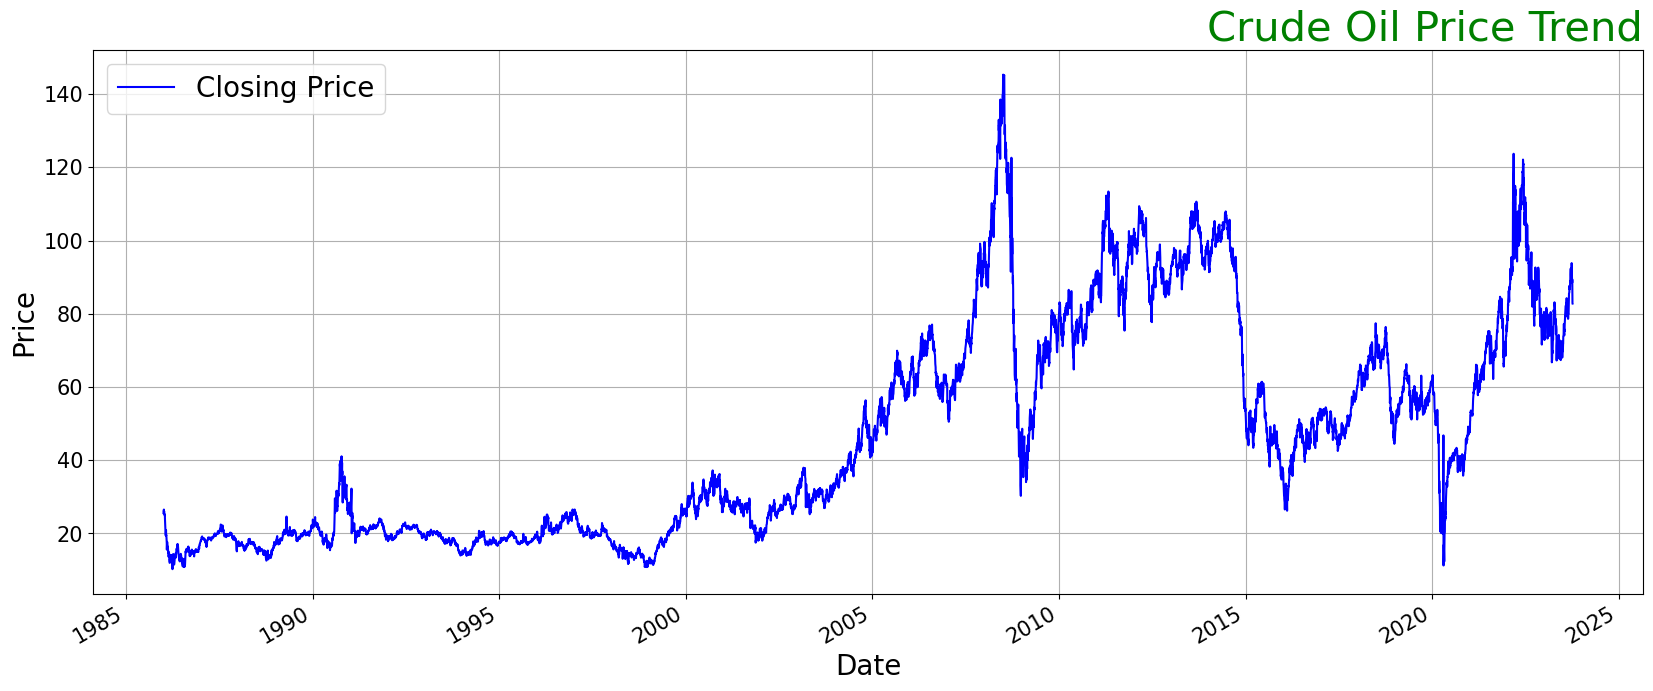

In [21]:
plt.figure(figsize=(20,8))
df.Close.plot(kind='line', c = 'blue', linewidth = '1.5', grid=True)
plt.title("Crude Oil Price Trend", fontsize=30,color='g', loc='right')
plt.xlabel("Date", size=20)
plt.ylabel("Price", size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel("Price", size=20)
plt.legend(['Closing Price'], fontsize=20, loc=2)
plt.show()

A basic time series plot shows the historical data over time.Here we consider daywise data. This is essential for understanding the underlying patterns, trends, and seasonality in the data. From the above graph, we conclude that it is not constant or not increasing or not decreasing. It is continuously fluctuating over the day.

# plot histogram graphical representation of data points organised into user specified ranges

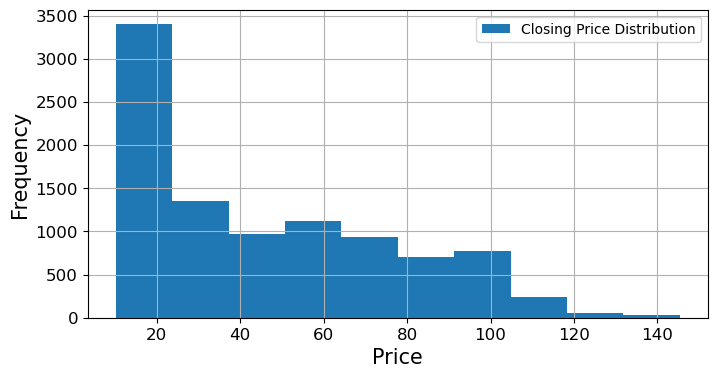

In [22]:
plt.figure(figsize=(8,4))
df['Close'].hist()
plt.xlabel("Price", size=15)
plt.ylabel("Frequency", size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(['Closing Price Distribution'], fontsize=10, loc=1)
plt.show()

In [23]:
#most of the price data lies between 30 - 110

# plot displot which shows price data distribution

<Figure size 1000x600 with 0 Axes>

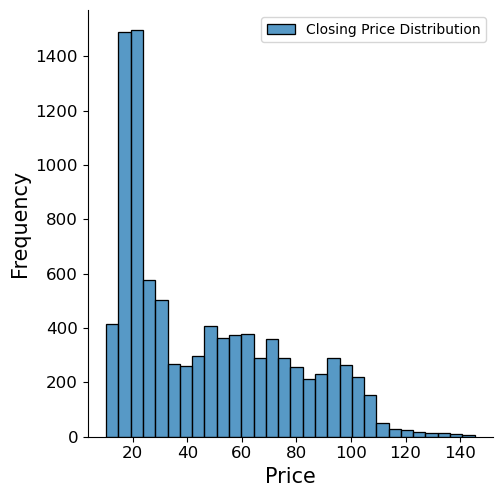

In [24]:
plt.figure(figsize=(10,6))
sns.displot(df['Close'])
plt.xlabel("Price", size=15)
plt.ylabel("Frequency", size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(['Closing Price Distribution'], fontsize=10, loc=1)
plt.show()

# Plot distpot which depicts the variation in the datadistribution.

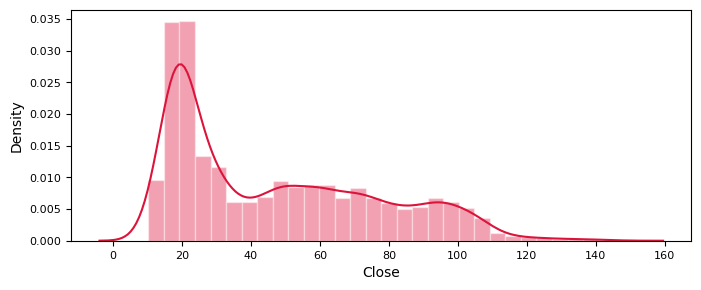

In [25]:
plt.figure(figsize=(8,3))
sns.distplot(df['Close'], color='crimson', hist_kws={"edgecolor": 'white'}, norm_hist=False)
plt.xticks(size=8)
plt.yticks(size=8)
plt.show()

In [26]:
#Plot histogram with only kernel density distribution

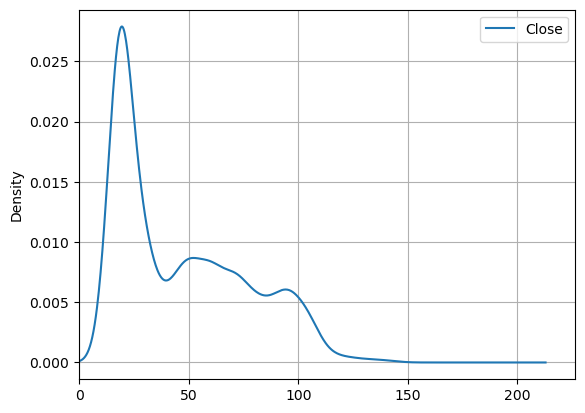

In [27]:
df.plot(kind='kde', grid=True, layout=True, xlim=0)
plt.show()

# copy original data into another dataframe which will use to create pivot table where date column split in date, month and year.

In [28]:
df1 = df.copy()
df1["Date"] = pd.to_datetime(df.index,format="%d-%b-%y")
df1["date"] = df1.Date.dt.strftime("%d") # date extraction
df1.sort_values('date', ascending = True, inplace= True)
df1["month"] = df1.Date.dt.strftime("%b") # month extraction
df1["year"] = df1.Date.dt.strftime("%Y") # year extraction
df1.sort_values('year', ascending = True, inplace= True)

In [29]:
df1.head()

,Close,Date,date,month,year
Date,,,,,
1986-04-16,11.50,1986-04-16,16,Apr,1986
1986-10-31,15.25,1986-10-31,31,Oct,1986
1986-07-01,12.39,1986-07-01,01,Jul,1986
1986-01-15,25.18,1986-01-15,15,Jan,1986
1986-07-31,11.23,1986-07-31,31,Jul,1986




# convert dataframe into spreadsheet style datasheet using pivot table 

In [30]:

heatmap_y_month = pd.pivot_table(data=df1,values="Close",index="year", columns= df1["month"], aggfunc= 'mean', fill_value=0)
heatmap_y_month

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1986,12.843636,15.096667,16.107619,15.454737,22.925455,11.584545,13.425714,12.612500,15.377619,15.221579,14.896818,14.866667
1987,18.677143,20.310952,17.274545,17.748947,18.651429,21.342174,20.073182,18.302857,19.437500,18.854000,19.859091,19.530000
1988,17.862500,15.523478,16.382381,16.795714,17.129500,15.497500,16.527727,16.197391,17.423636,14.141364,13.770476,14.535455
1989,21.069000,18.577826,21.100000,17.936500,18.024286,19.781429,20.050455,19.484091,20.123478,19.855909,20.097727,19.591429
1990,18.425500,27.307391,27.281000,22.113000,22.863182,18.454091,16.695238,20.387727,18.199545,32.332273,36.039565,33.507500
1991,20.830000,21.693636,19.498095,20.477500,25.234091,21.403043,20.189000,19.901500,21.232273,22.460952,23.230870,21.886500
1992,20.230000,21.339048,19.414091,19.012500,18.785455,21.775217,22.384545,18.921818,20.975500,20.338500,21.685909,21.881364
1993,20.252500,18.010909,14.514762,20.086111,19.032000,17.890000,19.094091,20.322174,19.949500,16.609048,18.153333,17.504286
1994,16.420000,18.383478,17.159524,14.781053,15.026667,19.654500,19.060000,14.680870,17.889048,18.069500,17.716190,17.445714


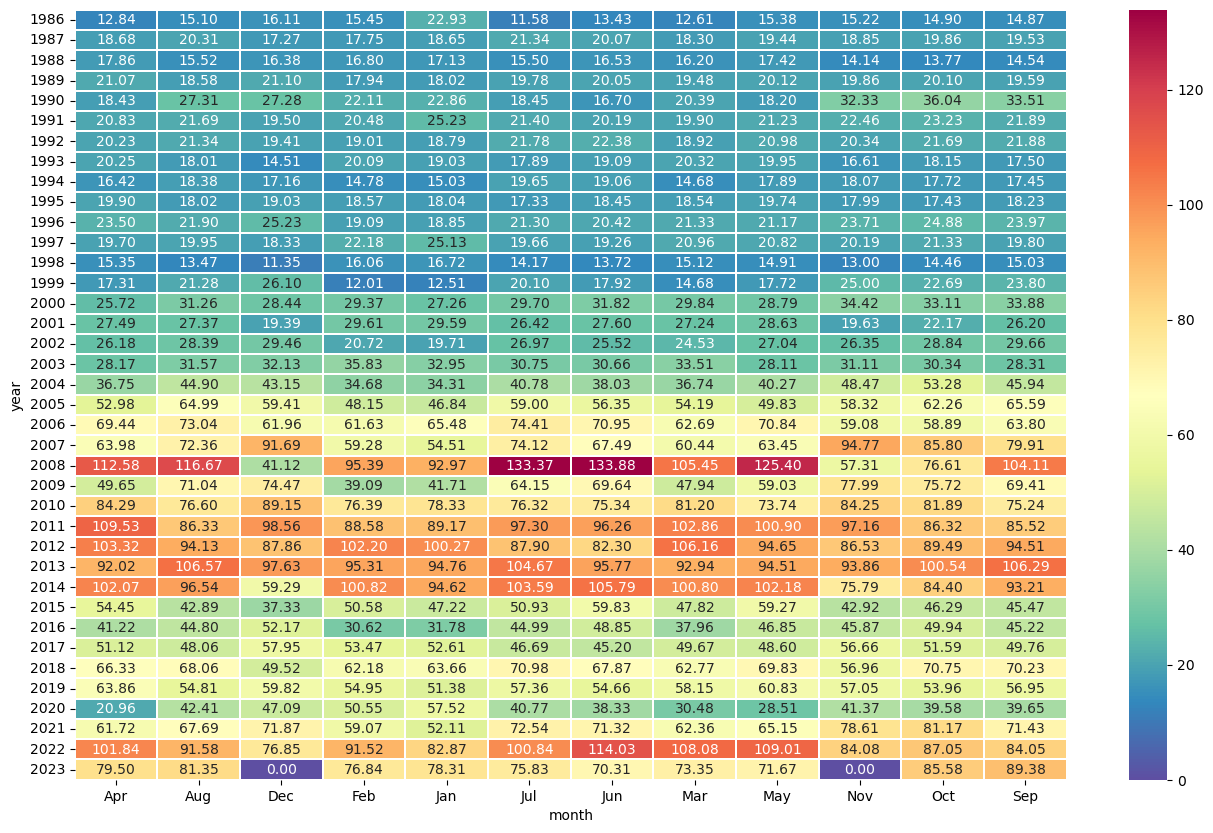

In [31]:
plt.figure(figsize=(16,10))
sns.heatmap(heatmap_y_month,annot=True,cmap='Spectral_r', fmt='.2f', linewidths=0.2, linecolor='w')
plt.show()

# from the above heatmap we can conclude that most of the prices are lieing between 30 to 120.

Text(0, 0.5, 'Price in $')

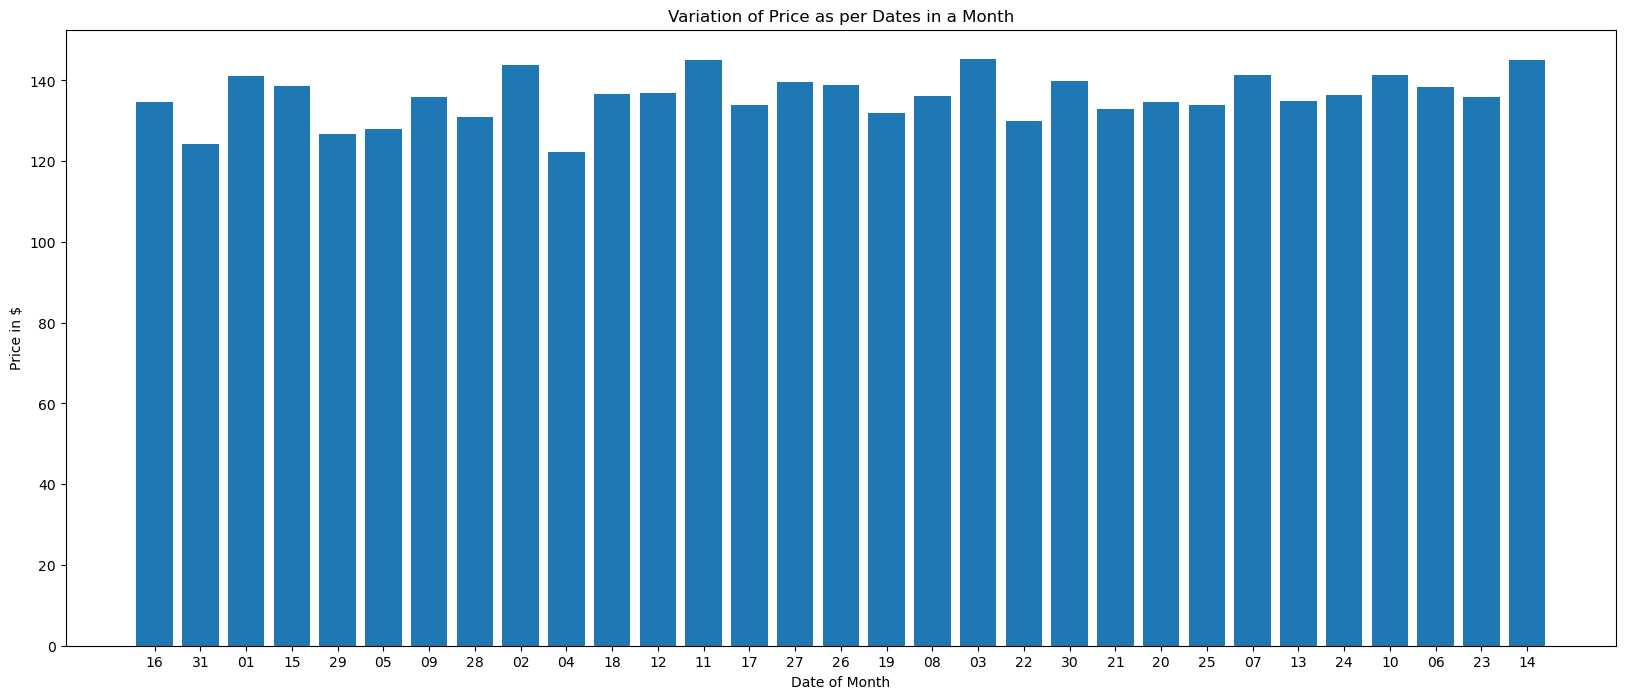

In [32]:
x = df1["date"]
y = df1['Close']

plt.figure(figsize=(20,8))
plt.bar(x, y)  #bar plot
plt.title('Variation of Price as per Dates in a Month')
plt.xlabel('Date of Month')
plt.ylabel('Price in $')

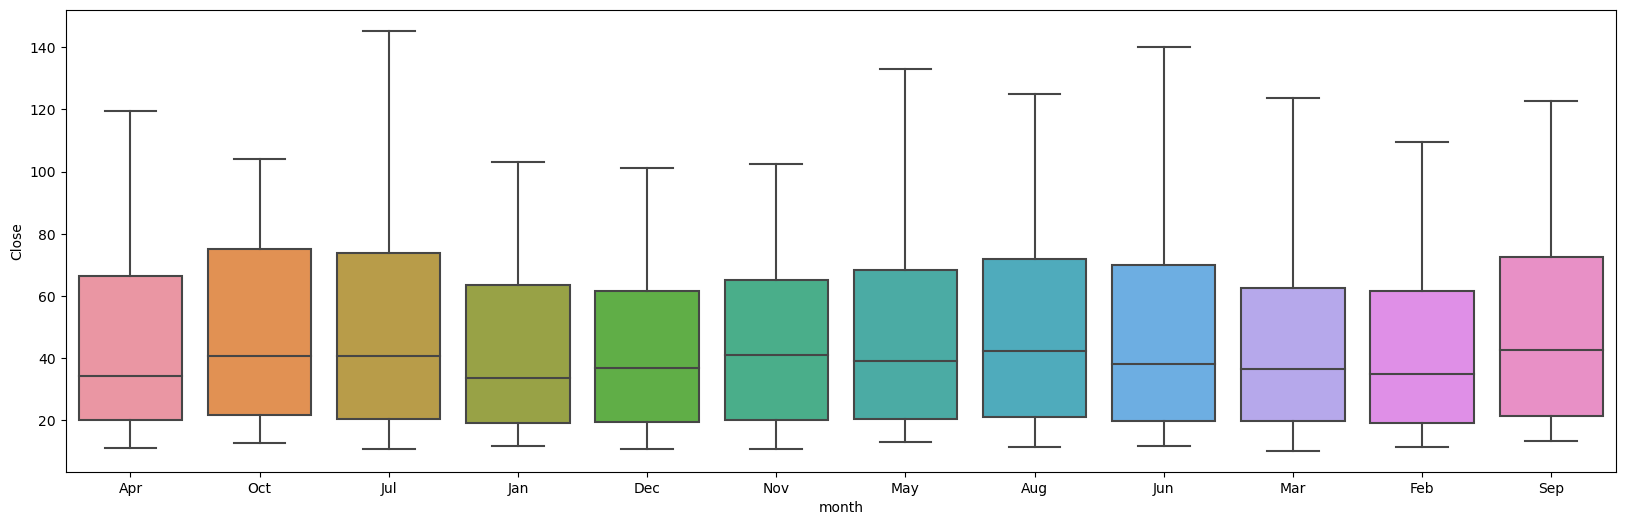

In [33]:
plt.figure(figsize=(20,6))
sns.boxplot(x="month",y="Close",data=df1)  # boxplot to detect outlier in monthwise data
plt.show()

Text(0, 0.5, 'Price in $')

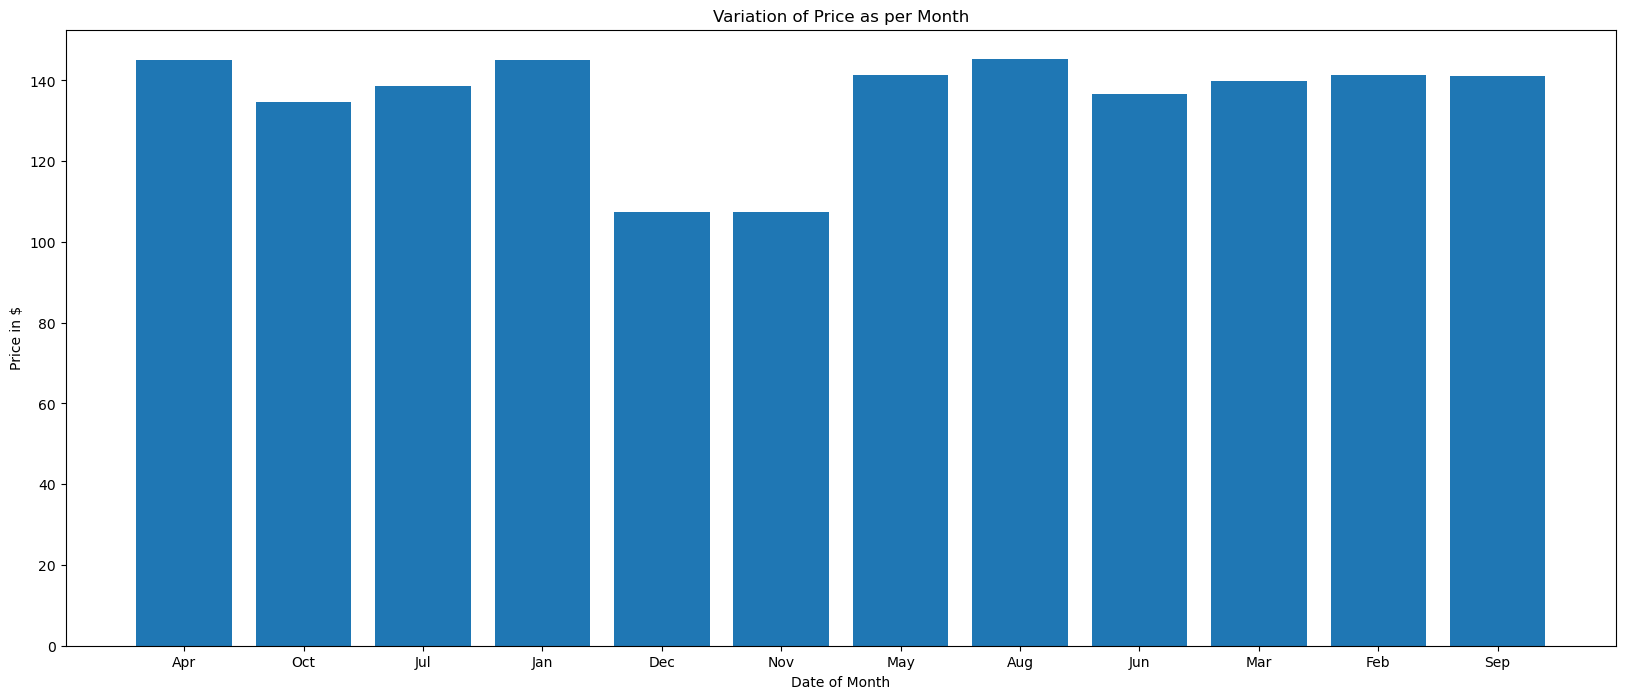

In [34]:
x = df1['month']
y = df1['Close'].sort_values()

plt.figure(figsize=(20,8))
plt.bar(x, y)  # barplot
plt.title('Variation of Price as per Month')
plt.xlabel('Date of Month')
plt.ylabel('Price in $')

<AxesSubplot:xlabel='year', ylabel='Close'>

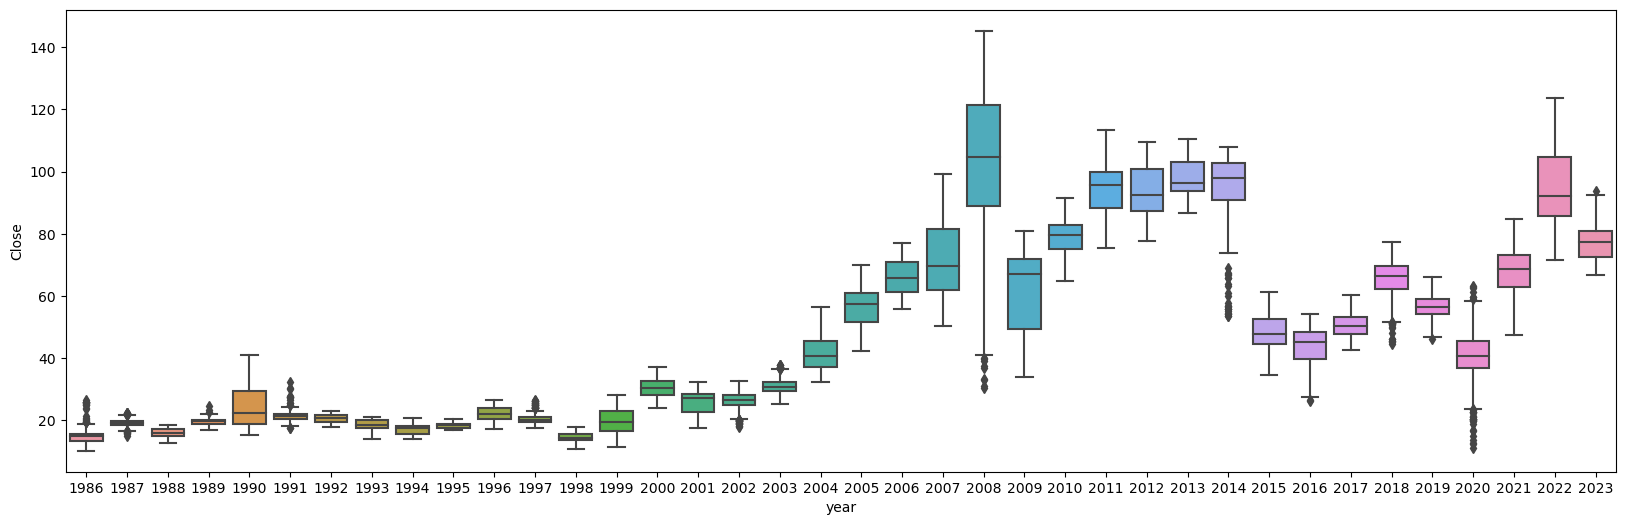

In [35]:
plt.figure(figsize=(20,6))
sns.boxplot(x="year",y="Close",data=df1) # boxplot to detect outlier in yearwise data

<AxesSubplot:xlabel='year', ylabel='Close'>

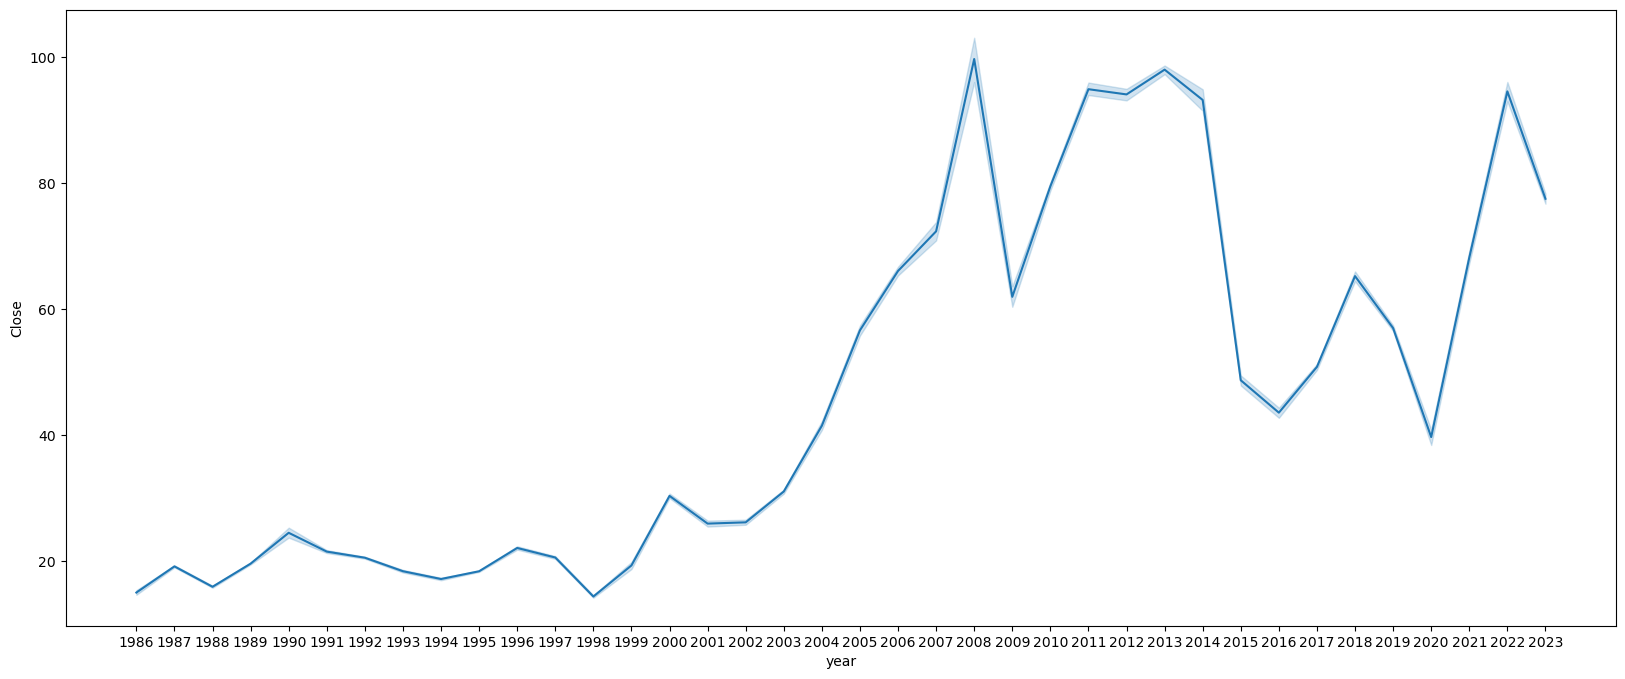

In [36]:
plt.figure(figsize=(20,8))
sns.lineplot(x="year",y="Close",data=df1) #lineplot - gives basic understanding of data

Text(0, 0.5, 'Price in $')

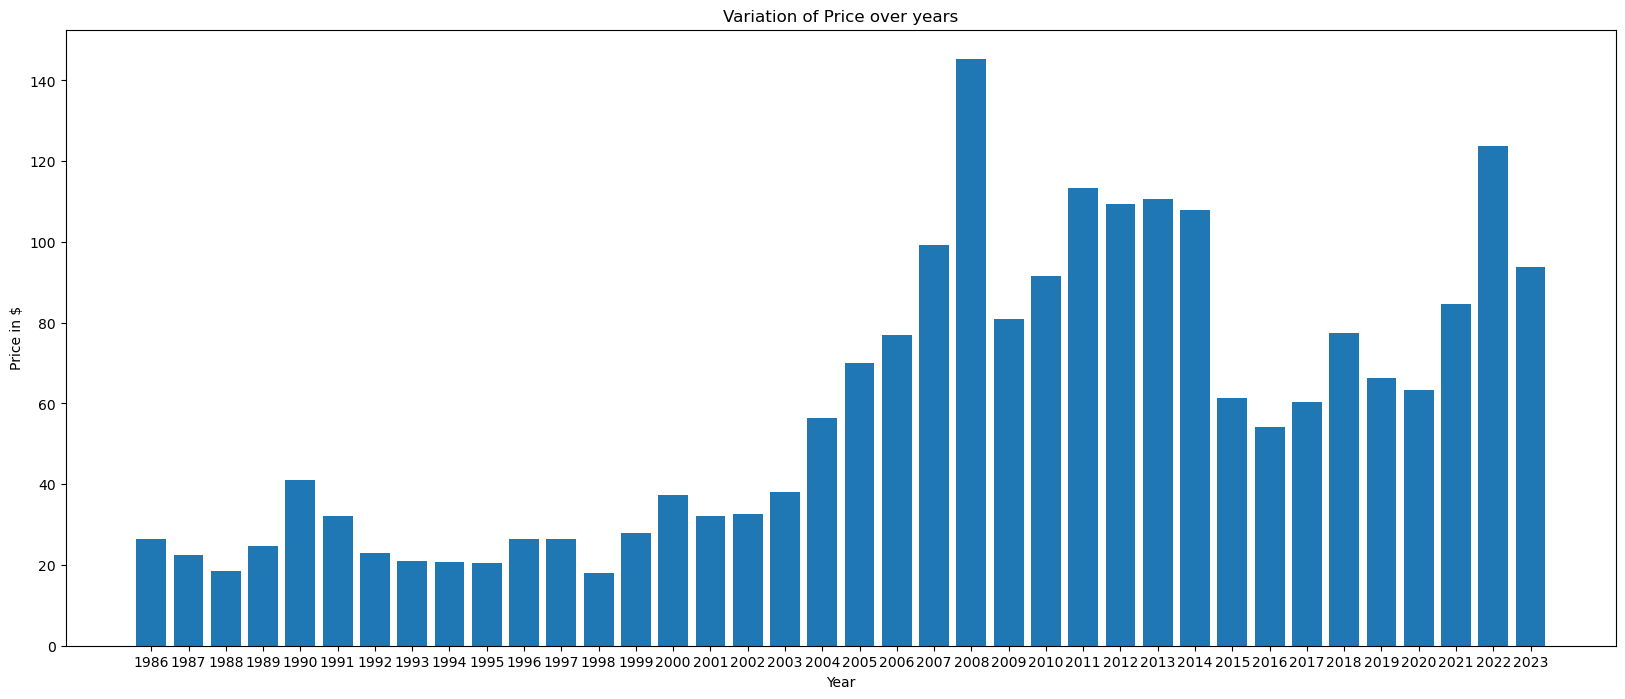

In [37]:
x = df1['year']
y = df1['Close']

plt.figure(figsize=(20,8))
plt.bar(x, y)
plt.title('Variation of Price over years')
plt.xlabel('Year')
plt.ylabel('Price in $')

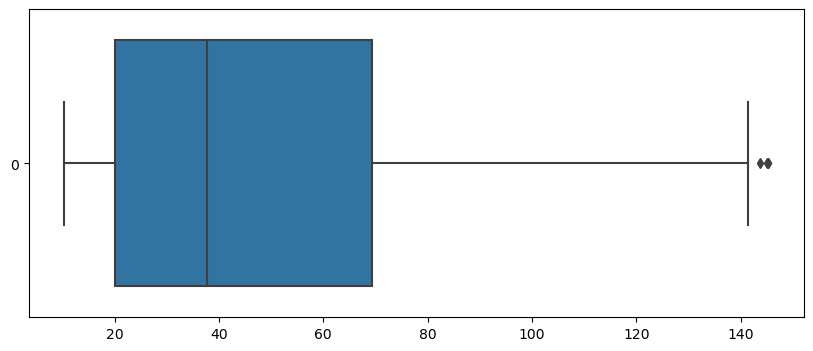

In [38]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df['Close'],orient='h')  # boxplot to detect close oil price data
plt.show()

In [39]:
#lineplot for date, month and year wise data

<AxesSubplot:xlabel='year', ylabel='Close'>

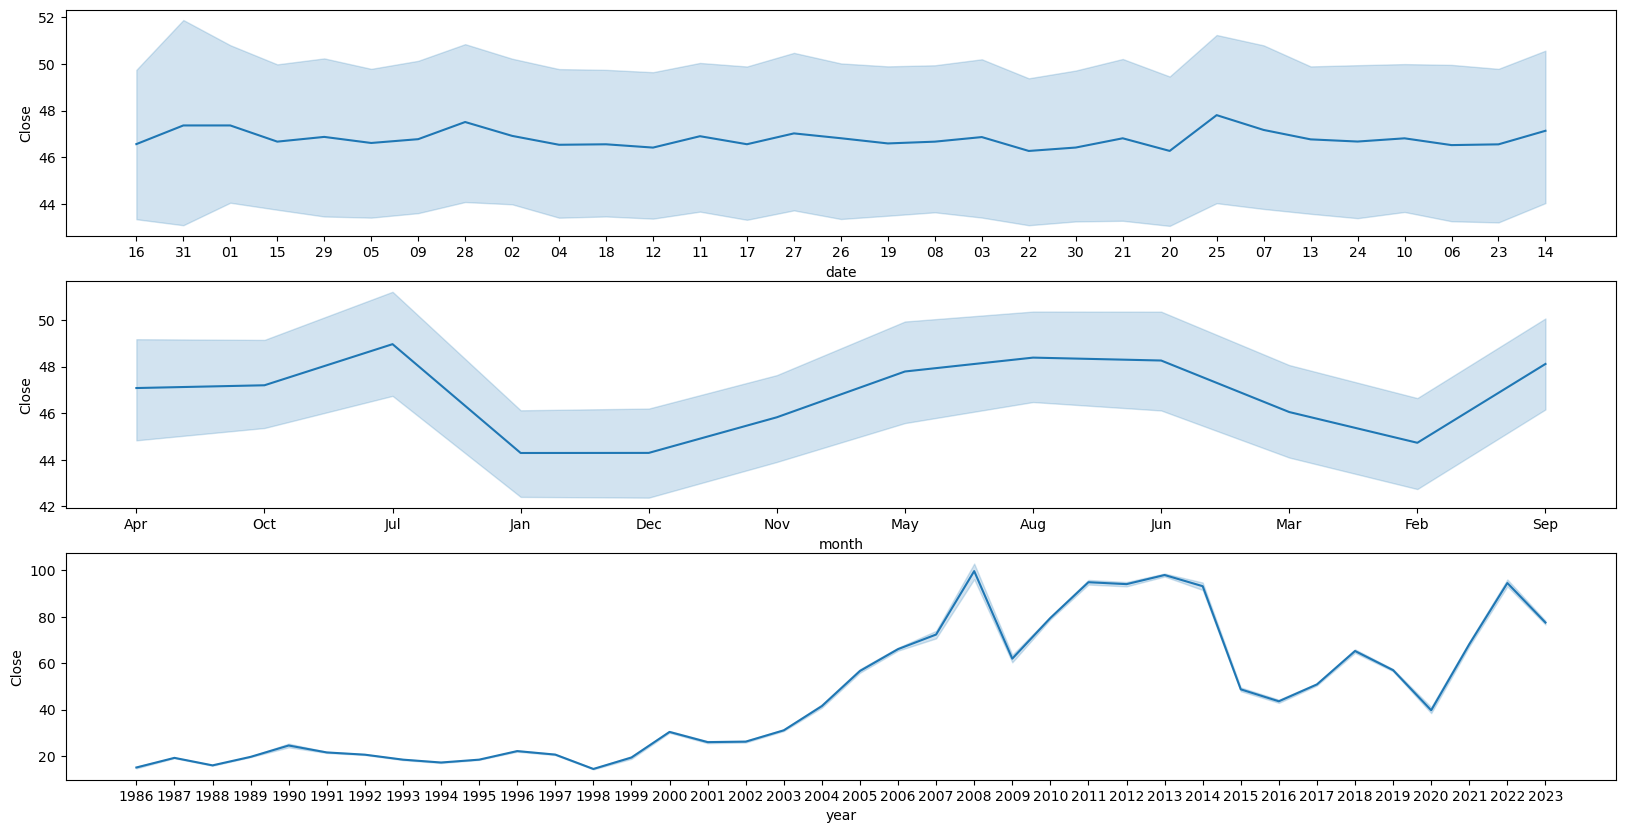

In [40]:
plt.figure(figsize=(20,10))
plt.subplot(311)
sns.lineplot(x="date",y="Close",data=df1)
plt.subplot(312)
sns.lineplot(x="month",y="Close",data=df1)
plt.subplot(313)
sns.lineplot(x="year",y="Close",data=df1)

# seasonal decompose plot

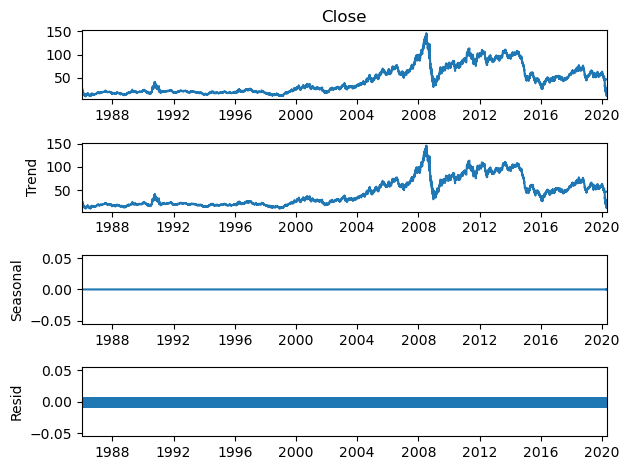

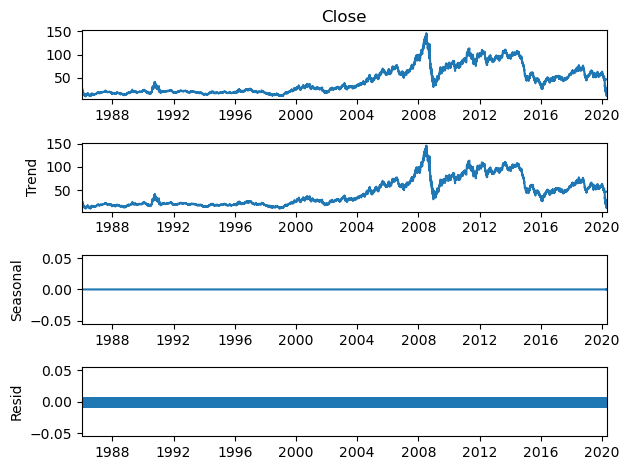

In [41]:
seasonal_ts_add=sm.tsa.seasonal_decompose(df.Close, model='additive', period=1)
seasonal_ts_add.plot()

# ACF and PACF plot

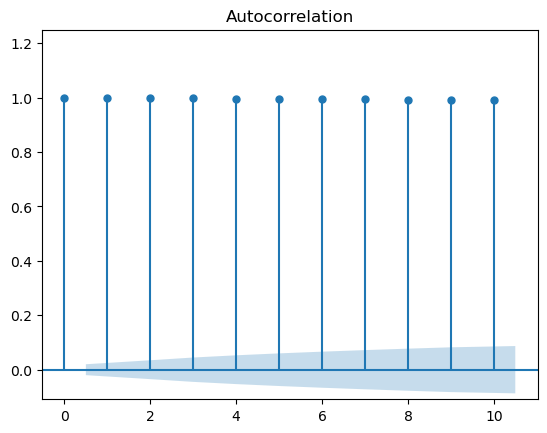

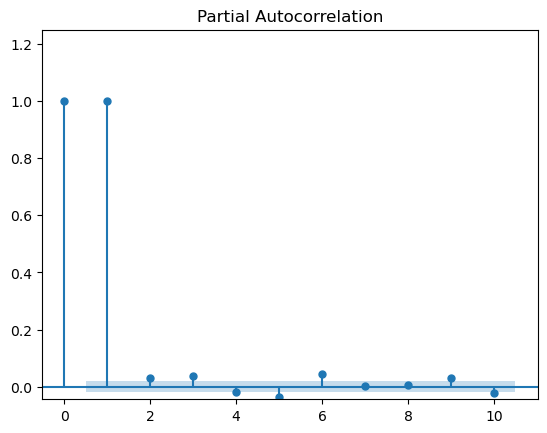

In [42]:
tsa_plots.plot_acf(df['Close'],lags=10, auto_ylims=True)
tsa_plots.plot_pacf(df['Close'],lags=10, auto_ylims=True)
plt.show()

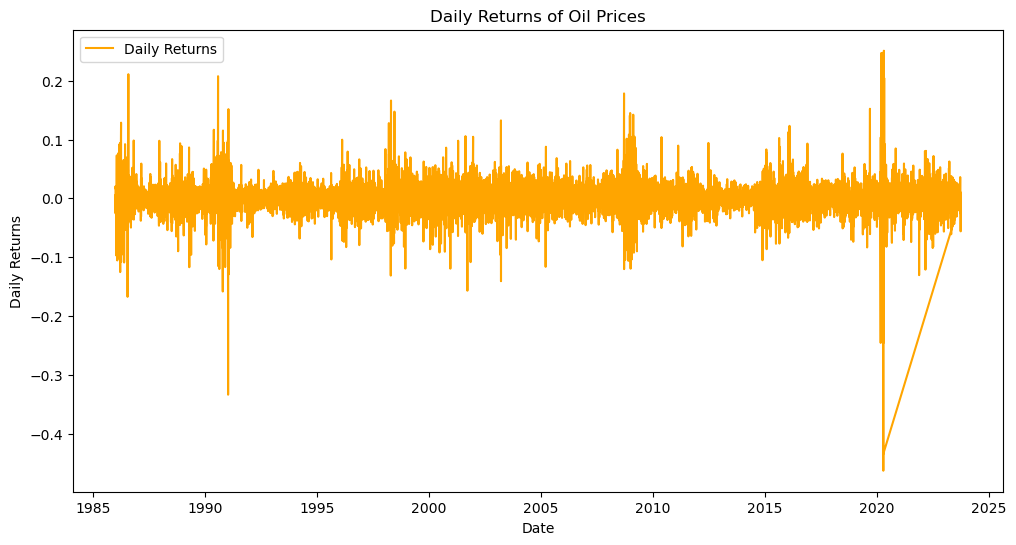

In [43]:
daily_returns = df['Close'].pct_change()
plt.figure(figsize=(12, 6))
plt.plot(daily_returns.index, daily_returns, label='Daily Returns', color='orange')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns of Oil Prices')
plt.legend()
plt.show()

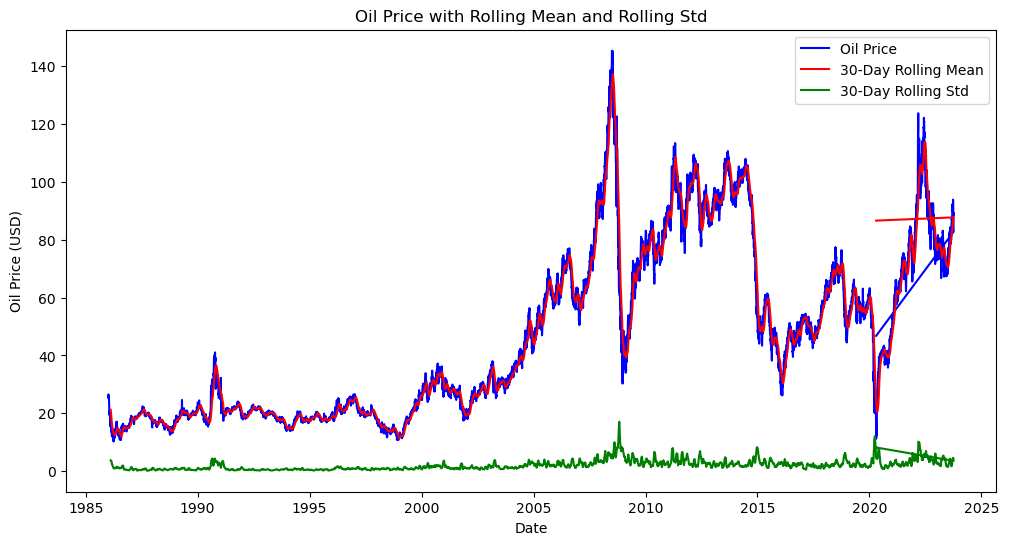

In [44]:
window_size = 30
rolling_mean = df['Close'].rolling(window=window_size).mean()
rolling_std = df['Close'].rolling(window=window_size).std()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Oil Price', color='blue')
plt.plot(rolling_mean.index, rolling_mean, label=f'{window_size}-Day Rolling Mean', color='red')
plt.plot(rolling_std.index, rolling_std, label=f'{window_size}-Day Rolling Std', color='green')
plt.xlabel('Date')
plt.ylabel('Oil Price (USD)')
plt.title('Oil Price with Rolling Mean and Rolling Std')
plt.legend()
plt.show()

# replace outlier using capping method

In [45]:
# finding the 1st quartile
q1 = np.quantile(df['Close'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(df['Close'], 0.75)
med = np.median(df['Close'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

49.285 143.3025 -53.83749999999999


In [46]:
outliers = df['Close'][(df['Close'] <= lower_bound) | (df['Close'] >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))  #find outliers data

The following are the outliers in the boxplot:Date
2008-07-02    143.74
2008-07-03    145.31
2008-07-11    144.96
2008-07-14    145.16
Name: Close, dtype: float64


In [47]:
df['Close'] = np.where(df['Close']> upper_bound, upper_bound,
                        np.where(df['Close']< lower_bound, lower_bound,
                          df['Close']))

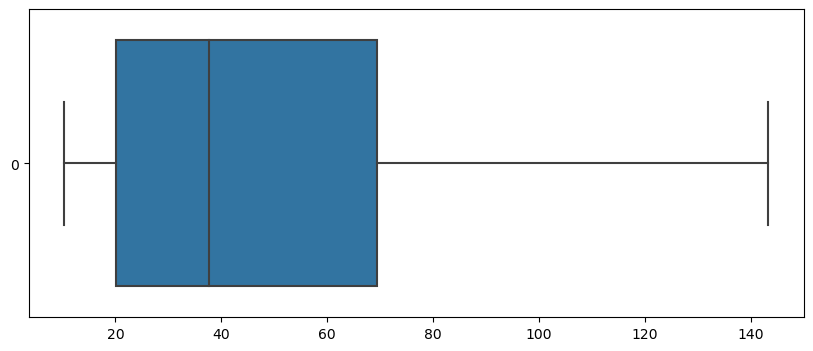

In [48]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df['Close'],orient='h')  # boxplot to detect close oil price data
plt.show()

In [49]:
df

,Close
Date,
1986-01-02,25.560000
1986-01-03,26.000000
1986-01-06,26.530000
1986-01-07,25.850000
1986-01-08,25.870000
...,...
2023-10-03,89.390000
2023-10-04,84.370000
2023-10-05,82.890000


In [50]:
june_data = df[df.index.month == 6]

In [51]:
june_data

,Close
Date,
1986-06-02,13.80
1986-06-03,13.35
1986-06-04,13.15
1986-06-05,13.21
1986-06-06,12.73
...,...
2023-06-26,69.53
2023-06-27,68.03
2023-06-28,69.56


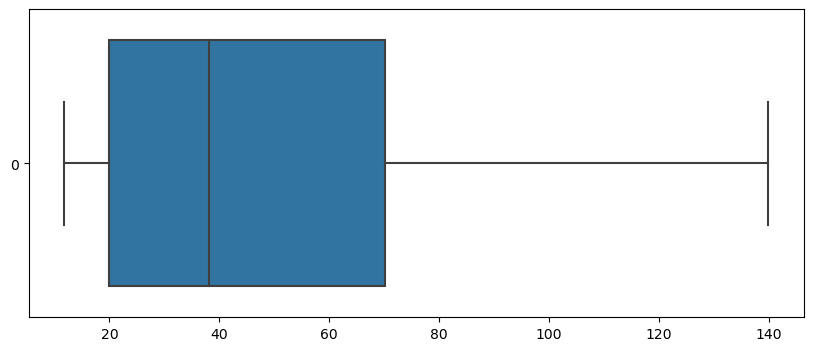

In [52]:
plt.figure(figsize=(10,4))
sns.boxplot(data=june_data['Close'],orient='h')  # boxplot to detect close oil price data
plt.show()

In [53]:
# finding the 1st quartile
q1 = np.quantile(june_data['Close'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(june_data['Close'], 0.75)
med = np.median(june_data['Close'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

50.245000000000005 145.4575 -55.52250000000001


In [54]:
outliers = june_data['Close'][(june_data['Close'] <= lower_bound) | (june_data['Close'] >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))  #find outliers data

The following are the outliers in the boxplot:Series([], Name: Close, dtype: float64)


In [55]:
june_data['Close'] = np.where(june_data['Close']> upper_bound, upper_bound,
                        np.where(june_data['Close']< lower_bound, lower_bound,
                          june_data['Close']))

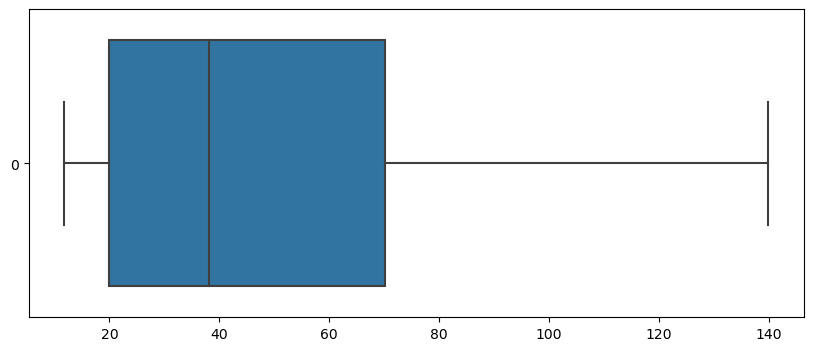

In [56]:
plt.figure(figsize=(10,4))
sns.boxplot(data=june_data['Close'],orient='h')  # boxplot to detect close oil price data
plt.show()

In [57]:
june_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 815 entries, 1986-06-02 to 2023-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   815 non-null    float64
dtypes: float64(1)
memory usage: 12.7 KB


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9558 entries, 1986-04-16 to 2023-08-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Close   9558 non-null   float64       
 1   Date    9558 non-null   datetime64[ns]
 2   date    9558 non-null   object        
 3   month   9558 non-null   object        
 4   year    9558 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 448.0+ KB


In [59]:
for index, row in june_data.iterrows():
    print(index)
    print(row['Close'])
    df.loc[index, 'Close'] = row['Close']
    df1.loc[index, 'Close'] = row['Close']

1986-06-02 00:00:00
13.8
1986-06-03 00:00:00
13.35
1986-06-04 00:00:00
13.15
1986-06-05 00:00:00
13.21
1986-06-06 00:00:00
12.73
1986-06-09 00:00:00
12.61
1986-06-10 00:00:00
12.38
1986-06-11 00:00:00
13.52
1986-06-12 00:00:00
13.69
1986-06-13 00:00:00
13.83
1986-06-16 00:00:00
13.65
1986-06-17 00:00:00
13.65
1986-06-18 00:00:00
13.62
1986-06-19 00:00:00
13.73
1986-06-20 00:00:00
14.44
1986-06-23 00:00:00
14.05
1986-06-24 00:00:00
13.98
1986-06-25 00:00:00
13.23
1986-06-26 00:00:00
13.14
1986-06-27 00:00:00
13.38
1986-06-30 00:00:00
12.8
1987-06-01 00:00:00
19.55
1987-06-02 00:00:00
19.7
1987-06-03 00:00:00
19.87
1987-06-04 00:00:00
19.75
1987-06-05 00:00:00
19.79
1987-06-08 00:00:00
19.94
1987-06-09 00:00:00
19.84
1987-06-10 00:00:00
19.83
1987-06-11 00:00:00
19.85
1987-06-12 00:00:00
19.93
1987-06-15 00:00:00
20.07
1987-06-16 00:00:00
20.27
1987-06-17 00:00:00
20.41
1987-06-18 00:00:00
20.5
1987-06-19 00:00:00
20.65
1987-06-22 00:00:00
20.49
1987-06-23 00:00:00
19.95
1987-06-24 00:00

2000-06-29 00:00:00
32.73
2000-06-30 00:00:00
32.44
2001-06-01 00:00:00
27.88
2001-06-04 00:00:00
28.14
2001-06-05 00:00:00
27.84
2001-06-06 00:00:00
27.56
2001-06-07 00:00:00
27.91
2001-06-08 00:00:00
28.43
2001-06-11 00:00:00
28.94
2001-06-12 00:00:00
29.13
2001-06-13 00:00:00
28.81
2001-06-14 00:00:00
29.12
2001-06-15 00:00:00
28.52
2001-06-18 00:00:00
27.55
2001-06-19 00:00:00
27.49
2001-06-20 00:00:00
26.52
2001-06-21 00:00:00
26.85
2001-06-22 00:00:00
27.02
2001-06-25 00:00:00
27.11
2001-06-26 00:00:00
26.97
2001-06-27 00:00:00
25.67
2001-06-28 00:00:00
25.75
2001-06-29 00:00:00
26.37
2002-06-03 00:00:00
25.1
2002-06-04 00:00:00
25.32
2002-06-05 00:00:00
25.02
2002-06-06 00:00:00
24.89
2002-06-07 00:00:00
24.72
2002-06-10 00:00:00
24.24
2002-06-11 00:00:00
24.21
2002-06-12 00:00:00
24.79
2002-06-13 00:00:00
25.54
2002-06-14 00:00:00
25.9
2002-06-17 00:00:00
25.98
2002-06-18 00:00:00
25.36
2002-06-19 00:00:00
25.57
2002-06-20 00:00:00
25.62
2002-06-21 00:00:00
25.51
2002-06-24 00:

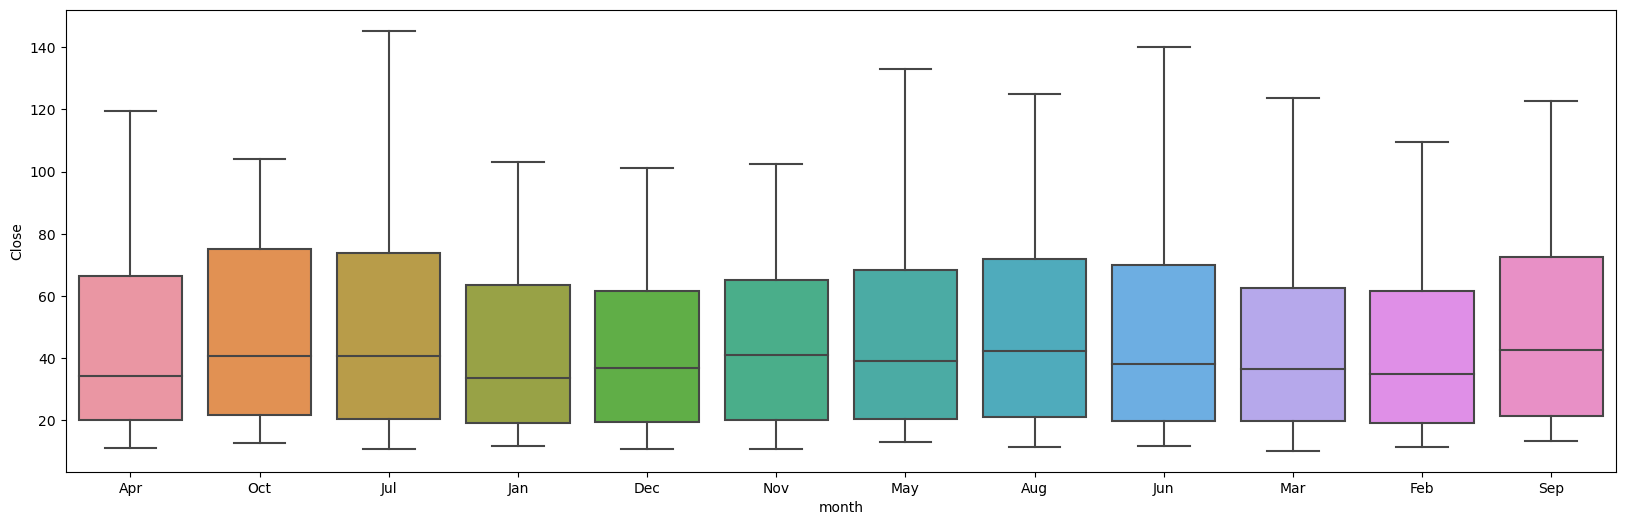

In [60]:
plt.figure(figsize=(20,6))
sns.boxplot(x="month",y="Close",data=df1)  # boxplot to detect outlier in monthwise data
plt.show()

In [61]:
df1

,Close,Date,date,month,year
Date,,,,,
1986-04-16,11.50,1986-04-16,16,Apr,1986
1986-10-31,15.25,1986-10-31,31,Oct,1986
1986-07-01,12.39,1986-07-01,01,Jul,1986
1986-01-15,25.18,1986-01-15,15,Jan,1986
1986-07-31,11.23,1986-07-31,31,Jul,1986
...,...,...,...,...,...
2023-05-31,67.69,2023-05-31,31,May,2023
2023-08-01,82.25,2023-08-01,01,Aug,2023
2023-04-06,80.70,2023-04-06,06,Apr,2023


# Check if data is stationary or not

In [62]:
from statsmodels.tsa.stattools import adfuller


In [63]:
# Perform ADF test
result = adfuller(df['Close'])

In [64]:
# Print ADF test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -2.301992842238043
p-value: 0.17132604579241328
Critical Values: {'1%': -3.431035573863008, '5%': -2.8618429812607538, '10%': -2.5669312718177952}


In [65]:
if result[1] <= 0.05:
    print("Data is likely stationary")
else:
    print("Data is likely non-stationary")

Data is likely non-stationary


# Convert stationary using difference transformation

In [66]:
# Assuming df is your DataFrame with a 'Date' and 'Price' column
df['Price_diff'] = df['Close'].diff()
df.dropna(inplace=True)  # Remove the first NaN row

In [67]:
result = adfuller(df['Price_diff'])

In [68]:
# Print ADF test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -12.576222957576546
p-value: 1.9547651452838943e-23
Critical Values: {'1%': -3.4310372309815733, '5%': -2.8618437135199972, '10%': -2.566931661601705}


In [69]:
if result[1] <= 0.05:
    print("Data is likely stationary")
else:
    print("Data is likely non-stationary")

Data is likely stationary


# Convert stationary using log transformation

In [70]:
df['Price_log'] = np.log(df['Close'])

In [71]:
df['Log_Price_diff'] = df['Price_log'] - df['Price_log'].shift(1)

In [72]:
result = adfuller(df['Log_Price_diff'].dropna())

In [73]:
# Print ADF test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -16.669949227012406
p-value: 1.548007258419354e-29
Critical Values: {'1%': -3.4310365815907327, '5%': -2.8618434265626393, '10%': -2.5669315088533877}


In [74]:
if result[1] <= 0.05:
    print("Data is likely stationary")
else:
    print("Data is likely non-stationary")

Data is likely stationary


In [75]:
#pip install pmdarima

In [76]:
from pmdarima import auto_arima

In [77]:
df.isna().sum()

Close             0
Price_diff        0
Price_log         0
Log_Price_diff    1
dtype: int64

In [78]:
new_df = df.dropna()

In [79]:
new_df.isna().sum()

Close             0
Price_diff        0
Price_log         0
Log_Price_diff    0
dtype: int64

In [80]:
new_df

,Close,Price_diff,Price_log,Log_Price_diff
Date,,,,
1986-01-06,26.530000,0.530000,3.278276,0.020180
1986-01-07,25.850000,-0.680000,3.252311,-0.025966
1986-01-08,25.870000,0.020000,3.253084,0.000773
1986-01-09,26.030000,0.160000,3.259250,0.006166
1986-01-10,25.650000,-0.380000,3.244544,-0.014706
...,...,...,...,...
2023-10-03,89.390000,0.920000,4.493009,0.010345
2023-10-04,84.370000,-5.020000,4.435212,-0.057797
2023-10-05,82.890000,-1.480000,4.417514,-0.017697


In [81]:
auto_arima_model = auto_arima(df['Close'], seasonal=False, trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=32398.513, Time=7.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32444.262, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32436.705, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32435.997, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32442.288, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=32429.853, Time=2.82 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=32428.492, Time=1.99 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=32397.461, Time=10.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=32426.523, Time=2.78 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=32395.080, Time=7.67 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=32408.917, Time=3.43 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=32400.710, Time=6.59 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=32398.748, Time=14.10 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=32396.235, Time=11.83 sec
 ARIMA(5,1,1)(0,

In [82]:
auto_arima_model = auto_arima(df['Close'], seasonal=True, trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=32398.513, Time=7.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32444.262, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32436.705, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32435.997, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32442.288, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=32429.853, Time=2.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=32428.492, Time=2.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=32397.461, Time=9.78 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=32426.523, Time=2.62 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=32395.080, Time=6.89 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=32408.917, Time=3.43 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=32400.710, Time=6.43 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=32398.748, Time=13.44 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=32396.235, Time=11.76 sec
 ARIMA(5,1,1)(0,0

In [83]:
print("Optimal (p, d, q) values:", auto_arima_model.order)

Optimal (p, d, q) values: (4, 1, 2)


# Model building

# LSTM MODEL

In [84]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [86]:
#import packages
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import load_model

In [87]:
# defining the batch size and number of epochs
#batch_size = 64
#epochs = 120
#timesteps = 30
batch_size = 32
epochs = 50
timesteps = 5

In [88]:
length = len(new_df)
length


9556

In [89]:
#test set will be 10% of entire data set  
length *= 1 - 0.1
length

8600.4

In [90]:
#get the length of training data set 
def get_train_length(dataset, batch_size, test_percent):
    # substract test_percent to be excluded from training, reserved for testset
    length = len(dataset)
    length *= 1 - test_percent
    train_length_values = []
    for x in range(int(length) - 100,int(length)): 
        modulo=x%batch_size
        if (modulo == 0):
            train_length_values.append(x)
            print(x)
    return (max(train_length_values))

In [91]:
length = get_train_length(new_df, batch_size, 0.1)
length

8512
8544
8576


8576

In [92]:
#Adding timesteps * 2
upper_train = length + timesteps*2
df_data_1_train = new_df[0:upper_train]
training_set = df_data_1_train.iloc[:,0:1].values
training_set.shape

(8586, 1)

In [93]:
# Feature Scaling i.e we scale each and every value between 0 and 1 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(np.float64(training_set))
training_set_scaled.shape

(8586, 1)

In [94]:
X_train = []
y_train = []

# Creating a data structure with n timesteps

length + timesteps
for i in range(timesteps, length + timesteps): 
    X_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i:i+timesteps,0])

len(X_train)
len (y_train)
np.array(X_train).shape
np.array(y_train).shape

(8576, 5)

In [95]:
# Reshaping
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
X_train.shape

(8576, 5, 1)

In [96]:
y_train.shape

(8576, 5, 1)

In [97]:
# Building the LSTM
# Importing the Keras libraries and packages

from keras.layers import Dense
from keras.layers import Input, LSTM
from keras.models import Model
import h5py

In [98]:
# Initialising the LSTM Model with MAE Loss-Function
# Using Functional API

inputs_1_mae = Input(batch_shape=(batch_size,timesteps,1))
lstm_1_mae = LSTM(10, stateful=True, return_sequences=True)(inputs_1_mae)
lstm_2_mae = LSTM(10, stateful=True, return_sequences=True)(lstm_1_mae)

output_1_mae = Dense(units = 1)(lstm_2_mae)

regressor_mae = Model(inputs=inputs_1_mae, outputs = output_1_mae)

regressor_mae.compile(optimizer='adam', loss = 'mae')
regressor_mae.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(32, 5, 1)]              0         
                                                                 
 lstm (LSTM)                 (32, 5, 10)               480       
                                                                 
 lstm_1 (LSTM)               (32, 5, 10)               840       
                                                                 
 dense (Dense)               (32, 5, 1)                11        
                                                                 
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [99]:
# 1st LSTM Layer 
parameters = 4 * 10 * (1 + 10 + 1)
parameters

480

In [100]:
# 2nd LSTM Layer 
parameters = 4 * 10 * (10 + 10 + 1)
parameters

840

In [101]:
for i in range(epochs):
    print("Epoch: " + str(i))
    regressor_mae.fit(X_train, y_train, shuffle=False, epochs = 1, batch_size = batch_size)
    regressor_mae.reset_states()

Epoch: 0
268/268 [==============================] - 3s 3ms/step - loss: 0.0565
Epoch: 1
268/268 [==============================] - 1s 3ms/step - loss: 0.0482
Epoch: 2
268/268 [==============================] - 1s 3ms/step - loss: 0.0414
Epoch: 3
268/268 [==============================] - 1s 3ms/step - loss: 0.0367
Epoch: 4
268/268 [==============================] - 1s 3ms/step - loss: 0.0340
Epoch: 5
268/268 [==============================] - 1s 3ms/step - loss: 0.0319
Epoch: 6
268/268 [==============================] - 1s 3ms/step - loss: 0.0290
Epoch: 7
268/268 [==============================] - 1s 3ms/step - loss: 0.0297
Epoch: 8
268/268 [==============================] - 1s 3ms/step - loss: 0.0297
Epoch: 9
268/268 [==============================] - 1s 3ms/step - loss: 0.0290
Epoch: 10
268/268 [==============================] - 1s 3ms/step - loss: 0.0282
Epoch: 11
268/268 [==============================] - 1s 3ms/step - loss: 0.0272
Epoch: 12
268/268 [==============================]

In [102]:
def get_test_length(dataset, batch_size):
    
    test_length_values = []
    for x in range(len(dataset) - 200, len(dataset) - timesteps*2): 
        modulo=(x-upper_train)%batch_size
        if (modulo == 0):
            test_length_values.append(x)
            print(x)
    return (max(test_length_values))

In [103]:
test_length = get_test_length(df, batch_size)
print(test_length)


9386
9418
9450
9482
9514
9546
9546


In [104]:
upper_test = test_length + timesteps*2
testset_length = test_length - upper_train
testset_length

960

In [105]:
print(upper_train, upper_test, len(df))

8586 9556 9557


In [106]:
# construct test set

#subsetting
df_data_1_test = df[upper_train:upper_test] 
test_set = df_data_1_test.iloc[:,0:1].values

#scaling
scaled_real_bcg_values_test = sc.fit_transform(np.float64(test_set))

#creating input data
X_test = []
for i in range(timesteps, testset_length + timesteps):
    X_test.append(scaled_real_bcg_values_test[i-timesteps:i, 0])
X_test = np.array(X_test)


#reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [107]:
#prediction
predicted_bcg_values_test_mae = regressor_mae.predict(X_test, batch_size=batch_size)
regressor_mae.reset_states()

print(predicted_bcg_values_test_mae.shape)


30/30 [==============================] - 1s 2ms/step
(960, 5, 1)


In [108]:
#reshaping
predicted_bcg_values_test_mae = np.reshape(predicted_bcg_values_test_mae, 
                                       (predicted_bcg_values_test_mae.shape[0], 
                                        predicted_bcg_values_test_mae.shape[1]))

predicted_bcg_values_test_mae.shape


(960, 5)

In [109]:
#inverse transform
predicted_bcg_values_test_mae = sc.inverse_transform(predicted_bcg_values_test_mae)
predicted_bcg_values_test_mae

array([[55.761818, 60.375328, 58.953995, 59.633244, 59.17518 ],
       [55.229385, 57.51531 , 58.879925, 59.206676, 58.408127],
       [52.388714, 57.454796, 58.45899 , 58.443592, 58.631886],
       ...,
       [86.17742 , 84.833374, 84.962234, 84.75892 , 85.387024],
       [85.639626, 85.10697 , 84.67788 , 85.54673 , 88.54735 ],
       [85.95973 , 84.81324 , 85.4489  , 88.719574, 86.324356]],
      dtype=float32)

In [110]:
#creating y_test data
y_test = []
for j in range(0, testset_length - timesteps):
    y_test = np.append(y_test, predicted_bcg_values_test_mae[j, timesteps-1])

# reshaping
y_test = np.reshape(y_test, (y_test.shape[0], 1))

y_test.shape

(955, 1)

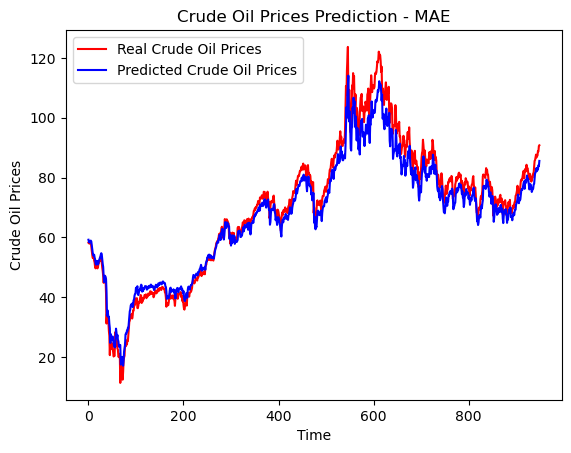

In [111]:
# Visualising the results
plt.plot(test_set[timesteps:len(y_test)], color = 'red', label = 'Real Crude Oil Prices')
plt.plot(y_test[0:len(y_test) - timesteps], color = 'blue', label = 'Predicted Crude Oil Prices')
plt.title('Crude Oil Prices Prediction - MAE')
plt.xlabel('Time')
plt.ylabel('Crude Oil Prices')
plt.legend()
plt.show()

In [112]:
import math
from sklearn.metrics import mean_squared_error
rmse_lstm = math.sqrt(mean_squared_error(test_set[timesteps:len(y_test)], y_test[0:len(y_test) - timesteps]))
print(rmse_lstm)

4.5718802244991465


In [113]:
from sklearn.metrics import mean_absolute_error
mae_lstm = mean_absolute_error(test_set[timesteps:len(y_test)], y_test[0:len(y_test) - timesteps])
print(mae_lstm)

3.6682193351536796


# Save Model into pickle

In [114]:
import pickle
from keras.models import Sequential


In [115]:
#creating lstm model for deployment purpose

In [116]:
prices = new_df[['Close']]

In [117]:
prices

,Close
Date,
1986-01-06,26.530000
1986-01-07,25.850000
1986-01-08,25.870000
1986-01-09,26.030000
1986-01-10,25.650000
...,...
2023-10-03,89.390000
2023-10-04,84.370000
2023-10-05,82.890000


In [118]:
# Data Scaling
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices)

In [119]:
# Create sequences for input and target
sequence_length = 10
X, y = [], []

for i in range(len(scaled_prices) - sequence_length):
    X.append(scaled_prices[i:i + sequence_length])
    y.append(scaled_prices[i + sequence_length])

X = np.array(X)
y = np.array(y)

# Split the data into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [120]:
# Build the LSTM model
lstm_model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(units=1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train, y_train, epochs=120, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/120
239/239 [==============================] - 2s 4ms/step - loss: 0.0105 - val_loss: 4.6964e-04
Epoch 2/120
239/239 [==============================] - 1s 4ms/step - loss: 2.1903e-04 - val_loss: 4.4376e-04
Epoch 3/120
239/239 [==============================] - 1s 4ms/step - loss: 2.0629e-04 - val_loss: 4.2396e-04
Epoch 4/120
239/239 [==============================] - 1s 4ms/step - loss: 1.9613e-04 - val_loss: 4.0592e-04
Epoch 5/120
239/239 [==============================] - 1s 4ms/step - loss: 1.8586e-04 - val_loss: 4.5841e-04
Epoch 6/120
239/239 [==============================] - 1s 4ms/step - loss: 1.8076e-04 - val_loss: 3.8294e-04
Epoch 7/120
239/239 [==============================] - 1s 4ms/step - loss: 1.7524e-04 - val_loss: 3.9479e-04
Epoch 8/120
239/239 [==============================] - 1s 4ms/step - loss: 1.5862e-04 - val_loss: 3.3630e-04
Epoch 9/120
239/239 [==============================] - 1s 4ms/step - loss: 1.6071e-04 - val_loss: 3.2090e-04
Epoch 10/120
239/239 [=

239/239 [==============================] - 1s 3ms/step - loss: 8.7936e-05 - val_loss: 2.1143e-04
Epoch 76/120
239/239 [==============================] - 1s 3ms/step - loss: 8.4792e-05 - val_loss: 2.0238e-04
Epoch 77/120
239/239 [==============================] - 1s 3ms/step - loss: 8.5165e-05 - val_loss: 1.9723e-04
Epoch 78/120
239/239 [==============================] - 1s 3ms/step - loss: 8.4850e-05 - val_loss: 2.0350e-04
Epoch 79/120
239/239 [==============================] - 1s 3ms/step - loss: 7.9941e-05 - val_loss: 2.1399e-04
Epoch 80/120
239/239 [==============================] - 1s 4ms/step - loss: 8.3617e-05 - val_loss: 2.6337e-04
Epoch 81/120
239/239 [==============================] - 1s 4ms/step - loss: 8.2763e-05 - val_loss: 2.0610e-04
Epoch 82/120
239/239 [==============================] - 1s 3ms/step - loss: 8.2210e-05 - val_loss: 2.1896e-04
Epoch 83/120
239/239 [==============================] - 1s 3ms/step - loss: 8.1414e-05 - val_loss: 2.1882e-04
Epoch 84/120
239/239 [=

In [121]:
# Save the model using pickle
with open('oil_price_lstm_model.pkl', 'wb') as model_file:
    pickle.dump(lstm_model, model_file)

In [122]:
with open('oil_price_lstm_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

In [123]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test)

60/60 [==============================] - 0s 2ms/step


In [124]:
# Display prediction results
#st.write("### Prediction Results")
actual_prices_df = pd.DataFrame(actual_prices, columns=['actual_prices'])
predicted_prices_df = pd.DataFrame(predicted_prices, columns=['predicted_prices'])
#st.write(f"Actual Close Prices: {float(actual_prices_df.iloc[-1])}")
#st.write(f"Predicted Prices: {float(predicted_prices_df.iloc[-1])}")

In [125]:
float(actual_prices_df.iloc[-1])

46.789439478915895

In [126]:
float(predicted_prices_df.iloc[-1])

82.45620727539062

# Model building using ARIMA MOdel

In [127]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [128]:
prices = new_df['Close']

In [129]:
# Fit the ARIMA model
auto_arima_model.fit(prices)

ARIMA(order=(4, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [130]:
# Make predictions
forecast, conf_int = auto_arima_model.predict(n_periods=30, return_conf_int=True)


In [131]:
# Create an index for the forecast period
forecast_index = pd.date_range(start=prices.index[-1], periods=30, freq='D')


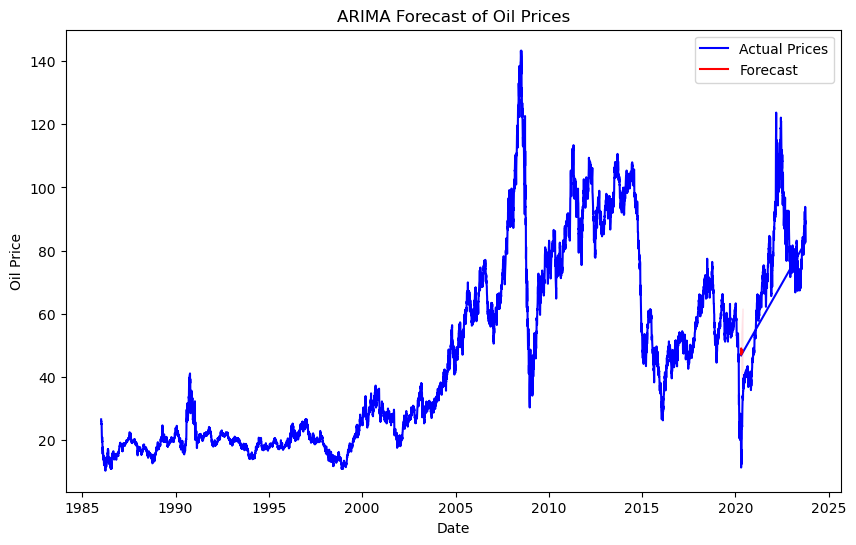

In [132]:
# Plot the actual data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(prices.index, prices, label='Actual Prices', color='blue')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('ARIMA Forecast of Oil Prices')
plt.legend()
plt.show()

In [133]:
# Calculate RMSE
rmse_arima = np.sqrt(mean_squared_error(prices[-30:], forecast))
print("RMSE:", rmse_arima)

RMSE: 39.39358732771724


# model building with Holt-Winters Model

In [134]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error


In [135]:
prices = new_df['Close']

In [136]:
# Fit the Holt-Winters model
model = ExponentialSmoothing(prices, trend='add', seasonal='add', seasonal_periods=30)
model_fit = model.fit()

In [137]:
# Make forecasts
forecast = model_fit.forecast(steps=30)

In [138]:
# Create an index for the forecast period
forecast_index = pd.date_range(start=prices.index[-1], periods=30, freq='D')

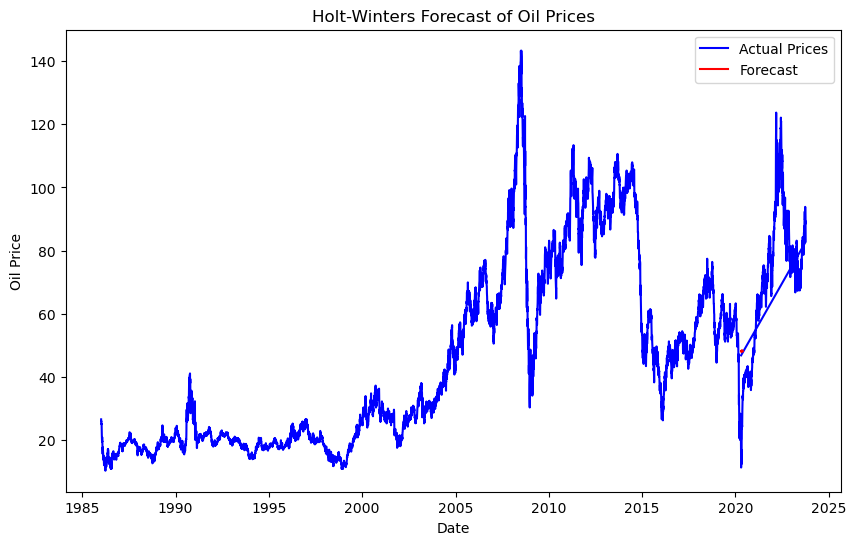

In [139]:
# Plot the actual data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(prices.index, prices, label='Actual Prices', color='blue')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Holt-Winters Forecast of Oil Prices')
plt.legend()
plt.show()

In [140]:
# Calculate RMSE
rmse_holt_winters = np.sqrt(mean_squared_error(prices[-30:], forecast))
print("RMSE:", rmse_holt_winters)

RMSE: 39.268997954666624


# Model building with holts/double exponential method

In [141]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import itertools

In [142]:
prices = new_df['Close']

In [143]:
# Define hyperparameter grid for grid search
param_grid = {
    'trend': ['add', 'mul', None],
    'seasonal': ['add', 'mul', None]
}

In [144]:
# Perform grid search
best_rmse = float('inf')
best_params = {}

In [145]:
for trend, seasonal in itertools.product(param_grid['trend'], param_grid['seasonal']):
    if trend == 'add' or trend == 'mul' or (trend is None and seasonal is None):
        model = ExponentialSmoothing(prices, trend=trend, seasonal=seasonal, seasonal_periods=30)
        result = model.fit()
        forecast = result.forecast(steps=30)
        rmse = np.sqrt(mean_squared_error(prices[-30:], forecast))
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = {'trend': trend, 'seasonal': seasonal}

In [146]:
# Print best hyperparameters
print("Best hyperparameters:", best_params)

Best hyperparameters: {'trend': 'add', 'seasonal': 'add'}


In [147]:
# Fit the chosen model
best_model = ExponentialSmoothing(prices, trend=best_params['trend'], seasonal=best_params['seasonal'], seasonal_periods=30)
best_result = best_model.fit()

In [148]:
# Make forecasts
forecast = best_result.forecast(steps=30)

In [149]:
# Create an index for the forecast period
forecast_index = pd.date_range(start=prices.index[-1], periods=30, freq='D')

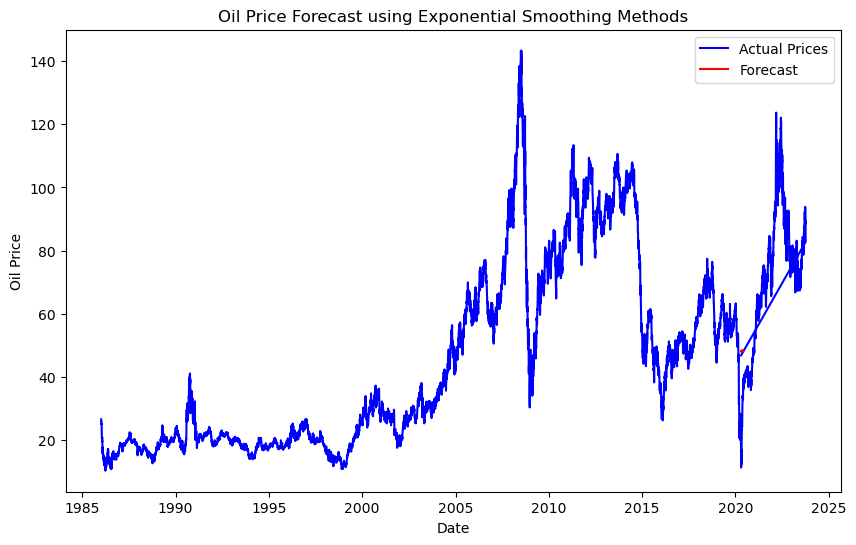

In [150]:
# Plot the actual data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(prices.index, prices, label='Actual Prices', color='blue')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Forecast using Exponential Smoothing Methods')
plt.legend()
plt.show()

In [151]:
rmse_double_exponential = best_rmse
rmse_double_exponential

39.268997954666624

# Model with Simple Exponential Smoothing

In [152]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

In [153]:
prices = new_df['Close']

In [154]:
# Step 3: Data Splitting
train_size = int(len(prices) * 0.8)
train_data, test_data = prices[:train_size], prices[train_size:]

In [155]:
# Fit the Simple Exponential Smoothing model
model = SimpleExpSmoothing(train_data)
result = model.fit()

In [156]:
# Make forecasts
forecast = result.forecast(steps=len(test_data))


In [157]:
# Calculate RMSE
rmse_simple_exponential = np.sqrt(mean_squared_error(test_data, forecast))
print("RMSE:", rmse_simple_exponential)

RMSE: 26.9833610190455


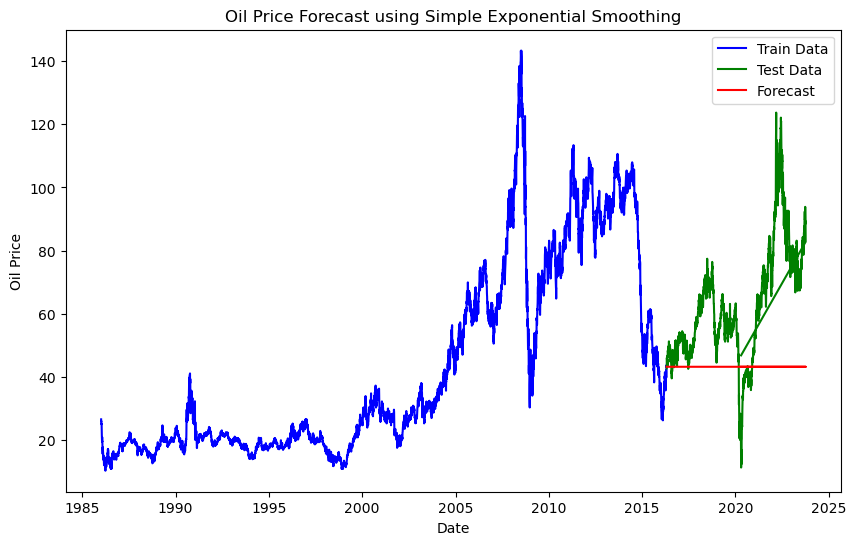

In [158]:
# Plot the actual data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train Data', color='blue')
plt.plot(test_data.index, test_data, label='Test Data', color='green')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Forecast using Simple Exponential Smoothing')
plt.legend()
plt.show()

# model with support vector regression

In [159]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [160]:
prices = new_df['Close'].values.reshape(-1, 1)

In [161]:
# Step 2: Data Preprocessing
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

In [162]:
# Step 3: Data Splitting
train_size = int(len(prices_scaled) * 0.8)
train_data, test_data = prices_scaled[:train_size], prices_scaled[train_size:]


In [163]:
# Step 4: Building the SVR Model
# Determine the value of the kernel and other hyperparameters.
# Kernel options: 'linear', 'poly', 'rbf', 'sigmoid', etc.
kernel = 'rbf'
C = 1.0  # Regularization parameter
epsilon = 0.1  # Epsilon parameter in the epsilon-insensitive loss function


In [164]:
svr_model = SVR(kernel=kernel, C=C, epsilon=epsilon)


In [165]:
# Step 5: Training the SVR Model
X_train, y_train = train_data[:-1], train_data[1:]  # Use lagged values as features
svr_model.fit(X_train, y_train.ravel())

SVR()

In [166]:
# Step 6: Testing the SVR Model
X_test, y_test = test_data[:-1], test_data[1:]  # Use lagged values as features
y_pred = svr_model.predict(X_test)

In [167]:
# Step 7: Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.0018546608306124477


In [168]:

# Calculate RMSE
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse_svr)

RMSE: 0.04306577330795823


In [169]:
# Step 8: Visualization
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inverse = scaler.inverse_transform(y_test)

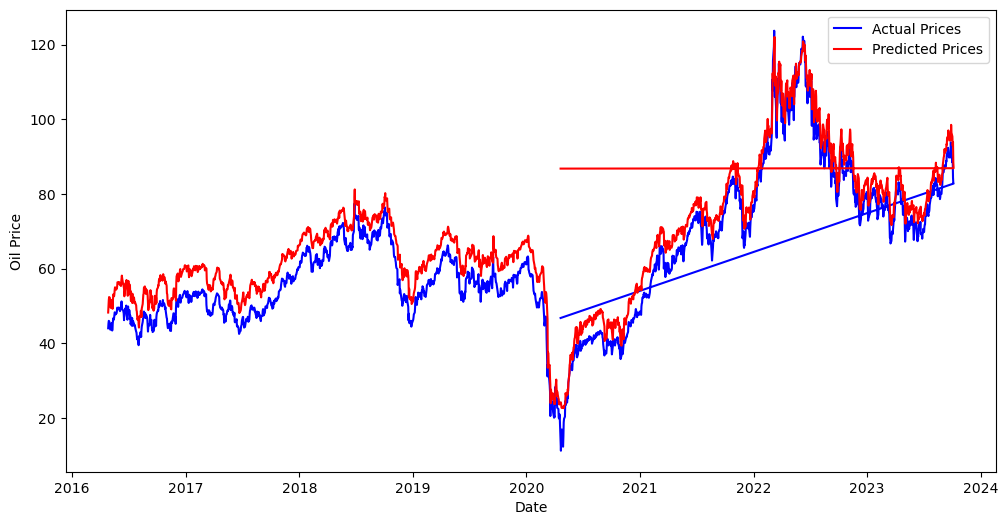

In [170]:
plt.figure(figsize=(12, 6))
plt.plot(new_df.index[train_size+1:], y_test_inverse, label='Actual Prices', color='blue')
plt.plot(new_df.index[train_size+1:], y_pred_inverse, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.legend()
plt.show()

In [171]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [172]:


import pandas as pd
from prophet import Prophet

# Import the Prophet library
import prophet


In [173]:
# Reset index and keep only 'Date' and 'Close' columns
data = new_df.reset_index()[['Date', 'Close']]
data.columns = ['ds', 'y']

In [174]:
# Split data into train and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]


In [175]:
train_data

,ds,y
0,1986-01-06,26.53
1,1986-01-07,25.85
2,1986-01-08,25.87
3,1986-01-09,26.03
4,1986-01-10,25.65
...,...,...
7639,2016-04-19,41.08
7640,2016-04-20,42.63
7641,2016-04-21,43.18
7642,2016-04-22,43.73


In [176]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(train_data)

01:58:27 - cmdstanpy - INFO - Chain [1] start processing
01:58:30 - cmdstanpy - INFO - Chain [1] done processing


In [177]:
# Create a DataFrame to hold the future dates for forecasting
future_dates = pd.date_range(start=data['ds'].iloc[-1], periods=len(test_data), freq='D')
future = pd.DataFrame({'ds': future_dates})
future

,ds
0,2020-04-20
1,2020-04-21
2,2020-04-22
3,2020-04-23
4,2020-04-24
...,...
1907,2025-07-10
1908,2025-07-11
1909,2025-07-12
1910,2025-07-13


In [178]:
# Make predictions
forecast = model.predict(future)

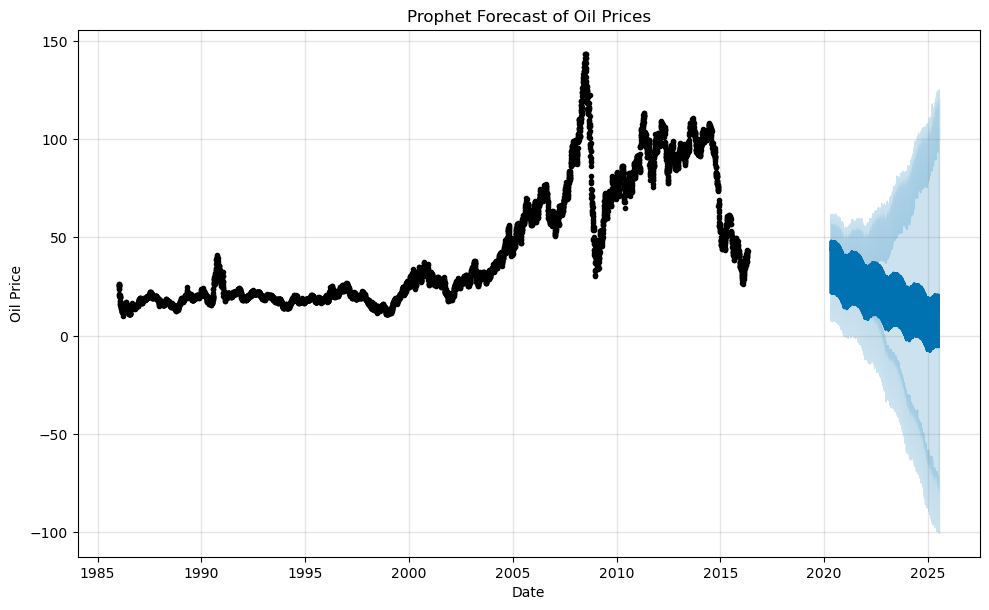

In [179]:
# Plot the actual data and the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Prophet Forecast of Oil Prices')
plt.show()

In [180]:
# Calculate RMSE
rmse_prophet = np.sqrt(mean_squared_error(test_data['y'], forecast['yhat']))
print("RMSE:", rmse)

RMSE: 39.38291957728524


In [181]:
model_arr = ['LSTM model','ARIMA','Holt-Winters','holt/double exponential','Simple exponential smoothing','SVR','Prophet']

In [182]:
rmse_arr = [rmse_lstm,rmse_arima,rmse_holt_winters,rmse_double_exponential,rmse_simple_exponential,rmse_svr,rmse_prophet]

In [183]:
rmse_data = {'Model': model_arr, 'RMSE': rmse_arr}
rmse_df = pd.DataFrame(rmse_data)

In [184]:
rmse_df

,Model,RMSE
0,LSTM model,4.571880
1,ARIMA,39.393587
2,Holt-Winters,39.268998
3,holt/double exponential,39.268998
4,Simple exponential smoothing,26.983361
5,SVR,0.043066
6,Prophet,44.821657


In [185]:
rmse_df_sorted = rmse_df.sort_values(by='RMSE', ascending=True)

In [186]:
rmse_df_sorted

,Model,RMSE
5,SVR,0.043066
0,LSTM model,4.571880
4,Simple exponential smoothing,26.983361
2,Holt-Winters,39.268998
3,holt/double exponential,39.268998
1,ARIMA,39.393587
6,Prophet,44.821657


# From the above table we get low RMSE value for SVR model but we are not going to use this model because the relationship between oil prices and influencing factors (like geopolitical events, economic indicators, etc.) can be highly complex and may require more sophisticated models to capture intricate patterns. SVR may not scale well with large datasets due to its computational complexity, especially when dealing with a high number of data points or features.SVR may struggle to capture complex seasonal and trend patterns that are commonly present in time series data.SO we are going to use LSTM model for our model deployment.